In [36]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
time1 = time()

In [37]:
transform = transforms.Compose([transforms.ToTensor()])

In [38]:

trainset = datasets.ImageFolder('cifar/train', transform=transform)
valset = datasets.ImageFolder('cifar/test', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=1000, shuffle=True)

In [39]:
dataiter = iter(trainloader)
X_train, y_train = dataiter.next()


X_test, y_test = iter(valloader).next()
X_test = X_test.view(X_test.shape[0], -1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

torch.Size([1000, 3, 32, 32])
torch.Size([1000])
torch.Size([1000, 3072])
torch.Size([1000])


Classes :  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog']


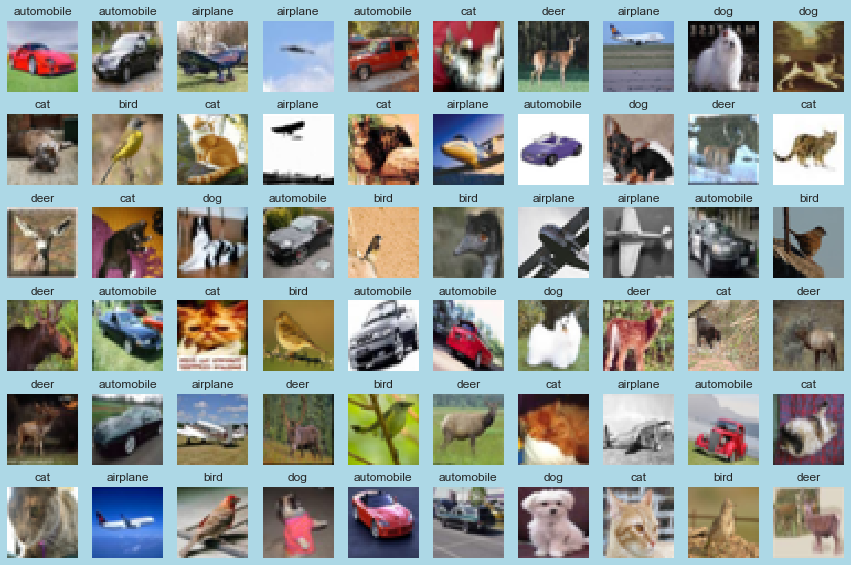

In [40]:

class_list = trainset.classes
figure = plt.figure(figsize=(15,10))
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(np.rot90(np.rot90(np.rot90(X_train[index].T))), interpolation="nearest")
    plt.title(class_list[y_train[index]])
print('Classes : ', class_list)

In [41]:
X_train = X_train.view(X_train.shape[0], -1)

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',
                 probability=True).fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo',
              probability=True).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1,
               decision_function_shape='ovo', probability=True).fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo',
              probability=True).fit(X_train, y_train)

logistic = LogisticRegression().fit(X_train, y_train)

bayes = GaussianNB().fit(X_train, y_train)

C:\Users\debon\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:

def view_classify(img, ps, title):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    ax1.imshow(np.rot90(np.rot90(np.rot90(images[index].numpy().T))), interpolation="nearest")
    ax1.axis('off')
    ax1.set_title(title)
    ax2.barh(np.arange(len(class_list)), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(len(class_list)))
    ax2.set_yticklabels(class_list)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [43]:
titles = ['Linear kernel', 'RBF kernel', 'Polynomial kernel', 'Sigmoid kernel','Logistic Regression','Bayes']

Model = Linear kernel
Predicted Class = bird
  -  -  -  -  -
Model = RBF kernel
Predicted Class = cat
  -  -  -  -  -
Model = Polynomial kernel
Predicted Class = deer
  -  -  -  -  -
Model = Sigmoid kernel
Predicted Class = cat
  -  -  -  -  -
Model = Logistic Regression
Predicted Class = bird
  -  -  -  -  -
Model = Bayes
Predicted Class = deer
  -  -  -  -  -


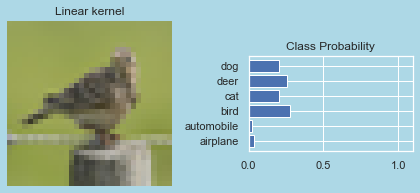

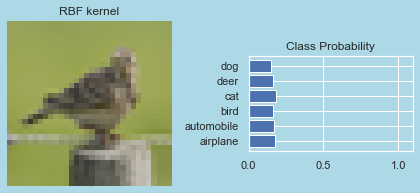

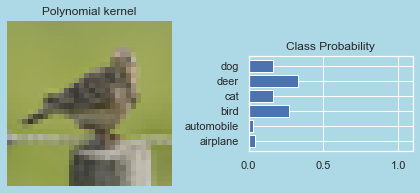

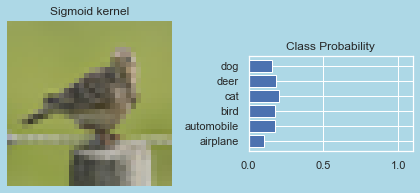

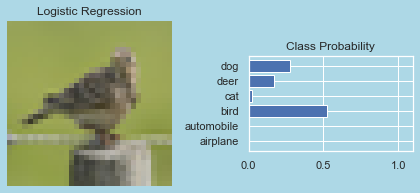

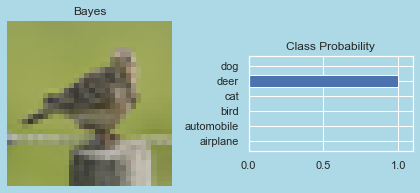

In [50]:
images, labels = next(iter(valloader))
img = images[0].view(1, 3072)
for i, clf in enumerate((linear, rbf, poly, sig,logistic,bayes)):
    print("Model =", titles[i])
    with torch.no_grad():
        probab = clf.predict_proba(img)

    print("Predicted Class =", class_list[np.argmax(probab)])
    view_classify(img.view(3, 32, 32), torch.tensor(probab), titles[i])
    print("  -  -  -  -  -")

images, labels = next(iter(valloader))


In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

def confusionMatrixAndAccuracyReport(Y_test, Y_pred, label):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = np.zeros(len(cm))
    for n in range(len(cm)):
        for i in range(len(cm)):
            for j in range(len(cm)):
                if (i != n and j != n) or (i == n and j == n):
                    classwiseAccuracy[n] += cm[i][j]

    classwiseAccuracy /= sum(cm.flatten())

    plt.figure(figsize=(6, 6))
    plt.title(label+' Accuracy : {0:3.3f}'.format(overallAccuracy), size=12)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues', fmt='g')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))

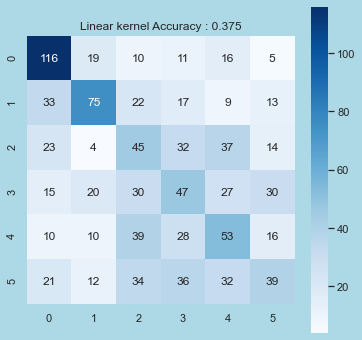

Overall Accuracy Score: 0.375
Classwise Accuracy Score: [0.837 0.841 0.755 0.754 0.776 0.787]
_____________________________________________________


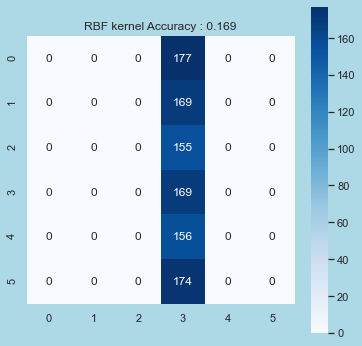

Overall Accuracy Score: 0.169
Classwise Accuracy Score: [0.823 0.831 0.845 0.169 0.844 0.826]
_____________________________________________________


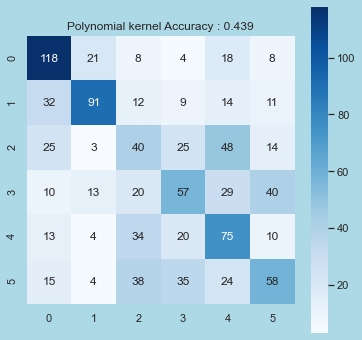

Overall Accuracy Score: 0.439
Classwise Accuracy Score: [0.846 0.877 0.773 0.795 0.786 0.801]
_____________________________________________________


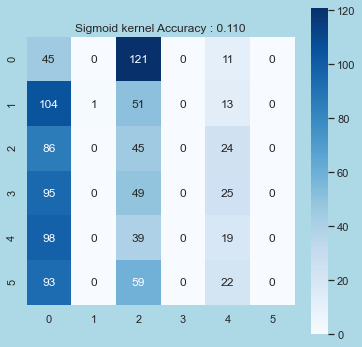

Overall Accuracy Score: 0.110
Classwise Accuracy Score: [0.392 0.832 0.571 0.831 0.768 0.826]
_____________________________________________________


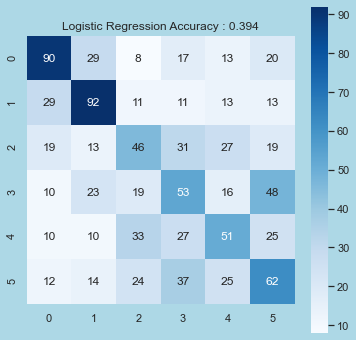

Overall Accuracy Score: 0.394
Classwise Accuracy Score: [0.833 0.834 0.796 0.761 0.801 0.763]
_____________________________________________________


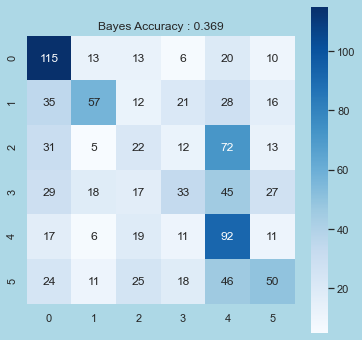

Overall Accuracy Score: 0.369
Classwise Accuracy Score: [0.802 0.835 0.781 0.796 0.725 0.799]
_____________________________________________________

All done (in minutes) = 2.3215380112330117


In [46]:

for i, clf in enumerate((linear, rbf, poly, sig,logistic,bayes)):
    confusionMatrixAndAccuracyReport(y_test, clf.predict(X_test), titles[i])
    print('_____________________________________________________')
print("\nAll done (in minutes) =",(time()-time1)/60)